In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data=pd.read_csv(r"C:\Users\Public\project\data\data.csv")
data.head()

,index,Date,Close,High,Low,Open,Volume
0,0,2015-01-01,1.209863,1.209863,1.209863,1.209863,0
1,1,2015-01-02,1.208941,1.208956,1.201080,1.208868,0
2,2,2015-01-05,1.194643,1.197590,1.188909,1.195500,0
3,3,2015-01-06,1.193902,1.197000,1.188693,1.193830,0
4,4,2015-01-07,1.187536,1.190000,1.180401,1.187479,0


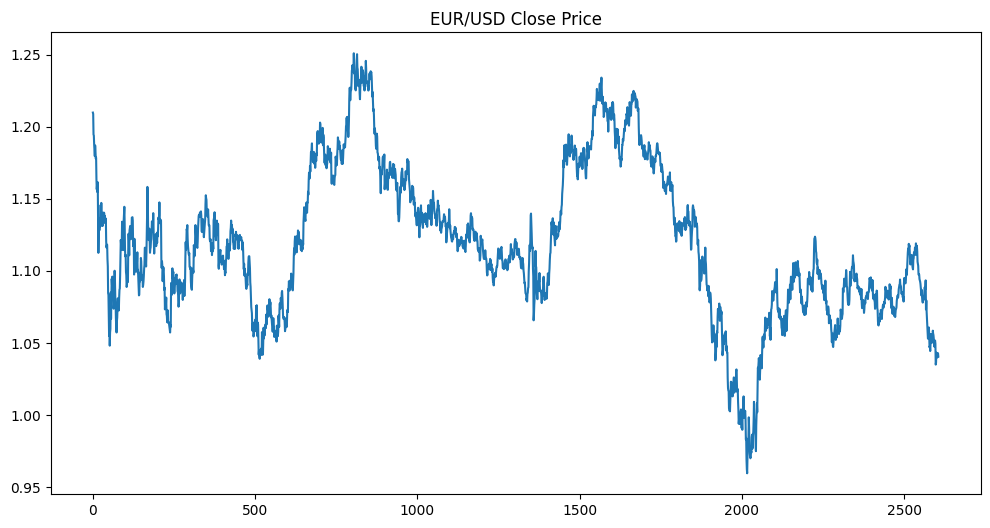

In [4]:
import matplotlib.pyplot as plt

t_close = data['Close']
t_close.plot(figsize=(12,6), title='EUR/USD Close Price')
plt.show()


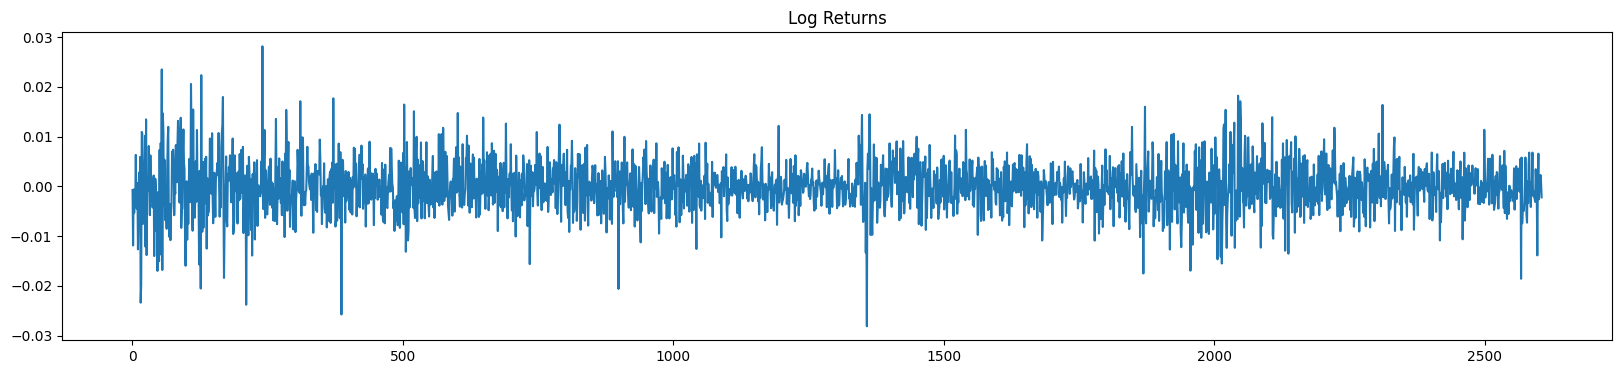

In [5]:
data['return']=data['Close'].pct_change()
data['log_return'] = np.log(data['Close'] / data['Close'].shift(1))
data=data.dropna()

ts = data['log_return']
ts.plot(figsize=(20,4), title="Log Returns")
plt.show()

In [6]:
data['return'].head()

1   -0.000762
2   -0.011827
3   -0.000621
4   -0.005332
5   -0.003314
Name: return, dtype: float64

In [7]:
#Check stationarity
from statsmodels.tsa.stattools import adfuller

result=adfuller(ts)
result

print("ADF Statistic:", result[0])
print("p-value:", result[1])

ADF Statistic: -22.21133897802859
p-value: 0.0


In [8]:
#p-value = 0.0 < 0.05, we reject the null hypothesis, do not need differencing (d=0) in ARIMAs
#og return series is stationarys

In [9]:
import pmdarima as pm

model = pm.auto_arima(ts,
                      seasonal=False,  # False if no seasonality, checked with close graph
                      stepwise=True, 
                      trace=True)
print(model.summary())


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-20230.081, Time=0.46 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-20238.083, Time=0.12 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-20236.235, Time=0.19 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-20236.238, Time=0.18 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-20235.889, Time=0.29 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-20236.435, Time=0.28 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 1.551 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2605
Model:                        SARIMAX   Log Likelihood               10120.041
Date:                Wed, 10 Dec 2025   AIC                         -20238.083
Time:                        04:12:45   BIC                         -20232.217
Sample:                             0   HQIC                        -20235.95

In [10]:
#ARIMA(0,0,0)

#This is white noise, meaning: No trend No autocorrelation No structure

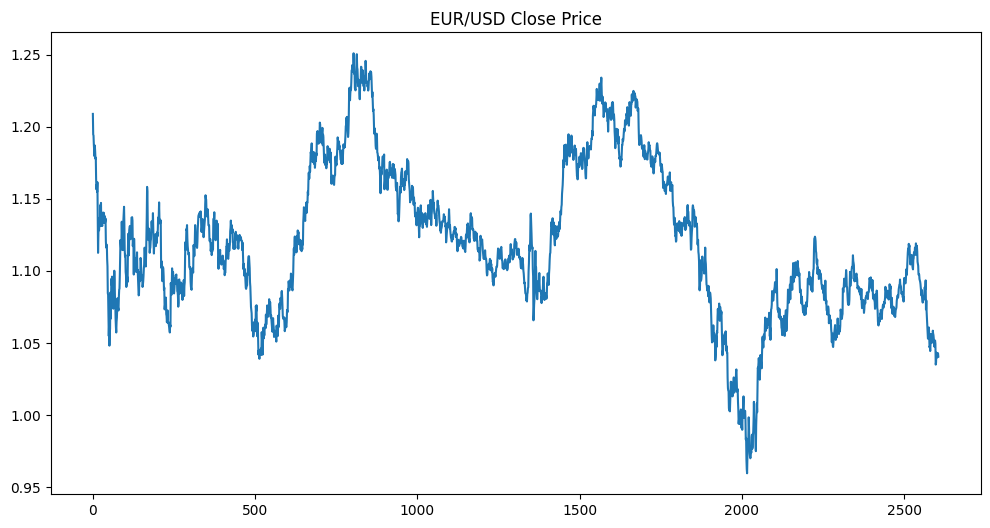

In [11]:

import matplotlib.pyplot as plt

ts = data['Close']
ts.plot(figsize=(12,6), title='EUR/USD Close Price')
plt.show()



In [12]:
n_periods = 10  #  steps to forecast
forecast, conf_int = model.predict(n_periods=n_periods,return_conf_int=True)


forecast


C:\Users\Public\project\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Public\project\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


2605    0.0
2606    0.0
2607    0.0
2608    0.0
2609    0.0
2610    0.0
2611    0.0
2612    0.0
2613    0.0
2614    0.0
dtype: float64

In [13]:
conf_int

array([[-0.00974632,  0.00974632],
       [-0.00974632,  0.00974632],
       [-0.00974632,  0.00974632],
       [-0.00974632,  0.00974632],
       [-0.00974632,  0.00974632],
       [-0.00974632,  0.00974632],
       [-0.00974632,  0.00974632],
       [-0.00974632,  0.00974632],
       [-0.00974632,  0.00974632],
       [-0.00974632,  0.00974632]])

In [14]:
forecast_df = pd.DataFrame({
    "Forecast": forecast,
    "Lower_CI": conf_int[:,0],
    "Upper_CI": conf_int[:,1]
})
print(forecast_df)

      Forecast  Lower_CI  Upper_CI
2605       0.0 -0.009746  0.009746
2606       0.0 -0.009746  0.009746
2607       0.0 -0.009746  0.009746
2608       0.0 -0.009746  0.009746
2609       0.0 -0.009746  0.009746
2610       0.0 -0.009746  0.009746
2611       0.0 -0.009746  0.009746
2612       0.0 -0.009746  0.009746
2613       0.0 -0.009746  0.009746
2614       0.0 -0.009746  0.009746


we do for price directly

In [15]:
#Check stationarity
from statsmodels.tsa.stattools import adfuller

result=adfuller(t_close)
result

print("ADF Statistic:", result[0])
print("p-value:", result[1])

ADF Statistic: -2.764897395010169
p-value: 0.06346550284008921


In [16]:
#p-value = 0.0 < 0.05, we reject the null hypothesis, do not need differencing (d=0) in ARIMAs

In [17]:
import pmdarima as pm

model_2 = pm.auto_arima(t_close,
                      seasonal=True,  # False if no seasonality, checked with close graph
                      m=5,
                    stepwise=True, 
                      trace=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[5] intercept   : AIC=-19688.358, Time=3.13 sec
 ARIMA(0,1,0)(0,0,0)[5] intercept   : AIC=-19700.420, Time=0.24 sec
 ARIMA(1,1,0)(1,0,0)[5] intercept   : AIC=-19697.041, Time=0.67 sec
 ARIMA(0,1,1)(0,0,1)[5] intercept   : AIC=-19697.078, Time=1.56 sec
 ARIMA(0,1,0)(0,0,0)[5]             : AIC=-19702.058, Time=0.15 sec
 ARIMA(0,1,0)(1,0,0)[5] intercept   : AIC=-19698.875, Time=0.47 sec
 ARIMA(0,1,0)(0,0,1)[5] intercept   : AIC=-19698.910, Time=0.26 sec
 ARIMA(0,1,0)(1,0,1)[5] intercept   : AIC=-19696.501, Time=1.25 sec
 ARIMA(1,1,0)(0,0,0)[5] intercept   : AIC=-19698.624, Time=0.45 sec
 ARIMA(0,1,1)(0,0,0)[5] intercept   : AIC=-19698.627, Time=1.04 sec
 ARIMA(1,1,1)(0,0,0)[5] intercept   : AIC=-19697.979, Time=0.46 sec

Best model:  ARIMA(0,1,0)(0,0,0)[5]          
Total fit time: 9.741 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observati

In [18]:
n_periods = 30  #  steps to forecast
forecast, conf_int = model_2.predict(n_periods=n_periods,return_conf_int=True)


forecast

2606    1.040615
2607    1.040615
2608    1.040615
2609    1.040615
2610    1.040615
2611    1.040615
2612    1.040615
2613    1.040615
2614    1.040615
2615    1.040615
2616    1.040615
2617    1.040615
2618    1.040615
2619    1.040615
2620    1.040615
2621    1.040615
2622    1.040615
2623    1.040615
2624    1.040615
2625    1.040615
2626    1.040615
2627    1.040615
2628    1.040615
2629    1.040615
2630    1.040615
2631    1.040615
2632    1.040615
2633    1.040615
2634    1.040615
2635    1.040615
dtype: float64

Shows very little day-to-day change
Has no strong trend
Has no weekly seasonality
Log returns were near zero

In [19]:
forecast_df = pd.DataFrame({
    "Forecast": forecast,
    "Lower_CI": conf_int[:,0],
    "Upper_CI": conf_int[:,1]
})
print(forecast_df)

      Forecast  Lower_CI  Upper_CI
2606  1.040615  1.029815  1.051416
2607  1.040615  1.025341  1.055889
2608  1.040615  1.021908  1.059322
2609  1.040615  1.019014  1.062216
2610  1.040615  1.016465  1.064766
2611  1.040615  1.014160  1.067071
2612  1.040615  1.012040  1.069190
2613  1.040615  1.010067  1.071163
2614  1.040615  1.008214  1.073016
2615  1.040615  1.006461  1.074769
2616  1.040615  1.004794  1.076436
2617  1.040615  1.003202  1.078029
2618  1.040615  1.001674  1.079557
2619  1.040615  1.000204  1.081027
2620  1.040615  0.998785  1.082445
2621  1.040615  0.997414  1.083817
2622  1.040615  0.996084  1.085146
2623  1.040615  0.994793  1.086437
2624  1.040615  0.993537  1.087693
2625  1.040615  0.992314  1.088916
2626  1.040615  0.991122  1.090109
2627  1.040615  0.989957  1.091274
2628  1.040615  0.988818  1.092412
2629  1.040615  0.987704  1.093526
2630  1.040615  0.986613  1.094617
2631  1.040615  0.985544  1.095687
2632  1.040615  0.984495  1.096736
2633  1.040615  0.98

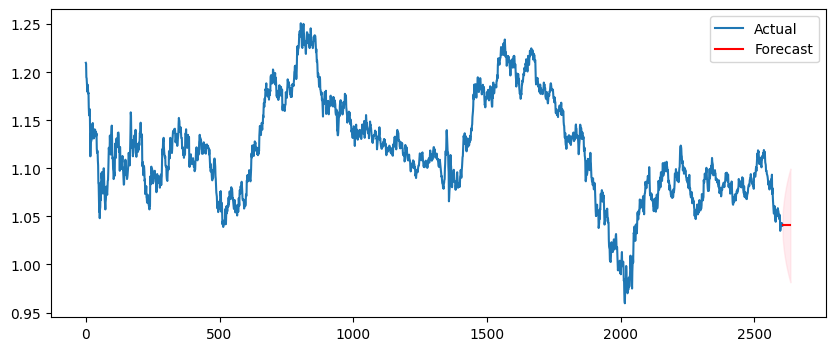

In [20]:
# Plot
plt.figure(figsize=(10,4))
plt.plot(t_close, label="Actual")
plt.plot(range(len(t_close), len(t_close)+n_periods), forecast, label="Forecast", color='red')

plt.fill_between(range(len(t_close), len(t_close)+n_periods),
                 conf_int[:,0], conf_int[:,1], color='pink', alpha=0.3)

plt.legend()
plt.show()


In [21]:
import os
import joblib

# Folder to save models

folder = "../models" 

# Make sure folder exists
if not os.path.exists(folder):
    os.makedirs(folder)

# Full path to save the model
model_path = os.path.join(folder, "model_ARIMA_forex.pkl")

# Save the model
joblib.dump(model_2, model_path)

print(f"Model saved to: {model_path}")

Model saved to: ../models\model_ARIMA_forex.pkl
